### Homework 4 Solution


In [2]:
%run ../Lessons/ourFunctions.py
%precision 3


'%.3f'

### Tasks

1. Explore the *binom* function from scipy.stats
2. Size matters: insurance company A insures 100 cars, company B 400 cars. The probability of a car being stolen is 10%. Compute the probabilities that more than 15% of the respective fleets are stolen.
3. What does A/B testing have to do with random walks?
    * Perform a permutation test on the A/B Testing DataCamp example
    * Simulate random walks to get a similar answer
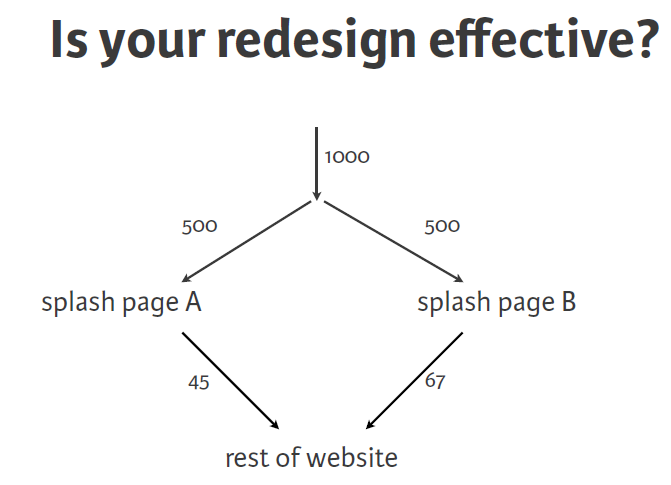


In [207]:
from scipy.stats import binom
#insurance company A insures 100 cars, company B 400 cars. 
nA=100
nB=400
#The probability of a car being stolen is 10%. 
p=0.1
#more than 15% of the respective fleets are stolen.
pTheftA = 1-binom.cdf(0.15*nA, nA, p)
pTheftB = 1-binom.cdf(0.15*nB, nB, p)
print(pTheftA, pTheftB)
#and of course, confirm this answer with 
# https://codeandstats.shinyapps.io/binomialtails/

0.03989052711108321 0.000634947243013384


In [37]:
## method A: permutation test

# Construct arrays of data: 
spA = np.array([True] * 45 + [False] * (500-45))
spB = np.array([True] * 67 + [False] * (500-67))

def frac_true_A(spA, spB):
    """Compute fraction of Democrat yea votes."""
    frac = sum(spA) / len(spA)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(spA, spB, frac_true_A , 10000)

#wrong:
#perm_replicates = draw_perm_reps(spA, spB, diff_of_means , 10000)


p-value = 0.0184


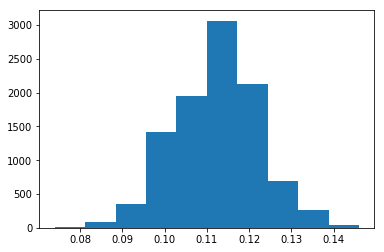

In [39]:
plt.hist(perm_replicates)
# Compute and print p-value: p
p = np.sum(perm_replicates <= 45/500)  / len(perm_replicates)
#p = np.sum(perm_replicates <= diff_of_means(spA,spB))  / len(perm_replicates)
print('p-value =', p)


In [34]:
np.std(perm_replicates)*500

10.068

In [63]:
#method B
nwalks = 5000
nsteps = 500
meanClick=(67+45)/(2*nsteps)

%time draws1 = np.random.uniform(0, 1, size=(nwalks, nsteps)) 
%time draws2 = np.random.uniform(0, 1, size=(nwalks, nsteps)) 

steps1 = np.where(draws1 <= meanClick, 1, 0)
walks1 = steps1.cumsum(1)
steps2 = np.where(draws2 <= meanClick, 1, 0)
walks2 = steps2.cumsum(1)
walks2.shape

Wall time: 55 ms
Wall time: 50 ms


(5000, 500)

In [46]:
tmp=walks1[:,nsteps-1]-walks2[:,nsteps-1]
tmp.shape
meanClick
np.mean(steps1[:,1])

-0.762

p-value = 0.0168


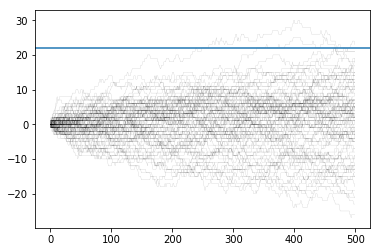

In [64]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
for i in range(1,100):
    ax.plot(walks1[i,:]-walks2[i,:], 'k', linewidth=0.25, alpha=0.25)
ax.axhline(67-45)
# Compute and print p-value: p
p = np.sum((walks1[:,nsteps-1]-walks2[:,nsteps-1]) >= (67-45)) / nwalks
print('p-value =', p)


 Stdev of the difference:

In [65]:
np.std(walks1[:,nsteps-1]-walks2[:,nsteps-1])

9.934

In [66]:
np.std(walks1[:,nsteps-1]), np.std(walks2[:,nsteps-1])

(7.104, 7.044)

In [32]:
14*1.4

19.600

In [50]:
#Analytical solution is close to permutation test: 
s = np.sqrt(2*nsteps*meanClick*(1-meanClick))
#right tail:
1-norm.cdf(67-45,loc=0,scale=s)    

0.014

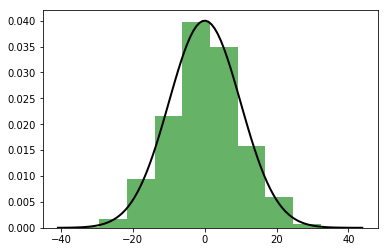

In [67]:
plt.hist(walks1[:,nsteps-1]-walks2[:,nsteps-1], density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, s)
plt.plot(x, p, 'k', linewidth=2)

In [72]:
from scipy.stats import binom
1-binom.cdf(67-45+2*nsteps*meanClick,2*nsteps, meanClick)

0.014